# Read Energy Output from SeisSol Simulation

https://seissol.readthedocs.io/en/latest/energy-output.html?highlight=energy#id1

**Gravitational energy = energy in tsunami** *= tsunami potential energy*

**Acoustic energy = compressional energy in the ocean = recoverable internal energy associated with compressing or expanding the water**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
plt.rcParams["font.family"] = "serif"
plt.rc('xtick', labelsize=11) 
plt.rc('ytick', labelsize=11)

In [5]:
#link = "/import/freenas-m-05-seissol/kutschera/HIWI/fully-coupled/HFFZ/output_o6_II/HFFZ_fullycp_o6_newmaster-energy.csv"
link = "/import/freenas-m-04-students/fkutschera/simulations/HFFZ_fullycp_o4_longrun/HFFZ_full-energy.csv"

In [6]:
df = pd.read_csv(link)
df.head()

,time,gravitational_energy,acoustic_energy,acoustic_kinetic_energy,elastic_energy,elastic_kinetic_energy,total_frictional_work,static_frictional_work,seismic_moment,plastic_moment
0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1,6.362890e-17,1.636140e-13,4.983540e-13,1.293770e+14,3.927260e+13,1.703500e+14,1.243040e+14,5.918790e+17,1.092850e+15
2,2,2.715390e+03,8.948610e+03,5.101590e+05,8.147560e+14,2.430880e+14,1.073000e+15,7.662180e+14,3.616380e+18,1.043330e+16
3,3,2.262910e+08,4.337180e+07,4.712250e+09,2.131400e+15,6.759170e+14,2.894580e+15,1.909530e+15,9.575510e+18,6.481310e+16
4,4,1.056370e+10,3.810620e+08,1.047210e+11,3.835850e+15,1.175610e+15,5.294510e+15,3.331350e+15,1.731180e+19,2.058150e+17


M0 = 1.31327e+20 and Mw = 7.345569348977339.


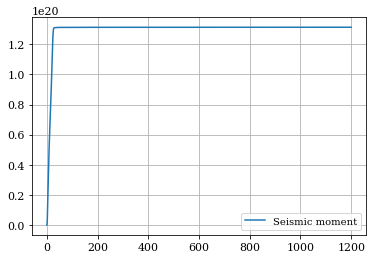

In [7]:
plt.plot(df['time'],df['seismic_moment'], label='Seismic moment')
plt.legend()
plt.grid()
M0 = df['seismic_moment'][len(df)-1]
Mw = 2/3 * (np.log10(M0) - 9.1)
print("M0 = {} and Mw = {}.".format(M0, Mw))

Text(0.5, 0, 'Time [s]')

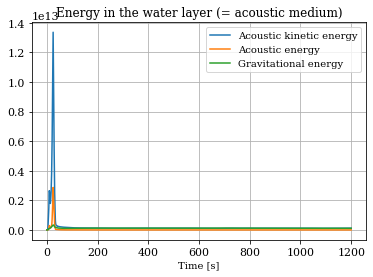

In [12]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.legend()
plt.grid()
plt.title("Energy in the water layer (= acoustic medium)")
plt.xlabel('Time [s]')
#plt.xlim(0,40)

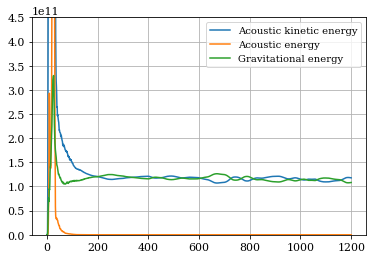

In [13]:
plt.plot(df['time'],df['acoustic_kinetic_energy'], label='Acoustic kinetic energy')
plt.plot(df['time'],df['acoustic_energy'], label='Acoustic energy')
plt.plot(df['time'],df['gravitational_energy'], label='Gravitational energy')
plt.ylim([0,4.5e11])
#plt.xlim([70,80])
plt.legend(loc="upper right")
#from intersect import intersection
#x,y = intersection(df['gravitational_energy'],df['acoustic_energy'])
plt.grid()

Text(0.5, 0, 'Time [s]')

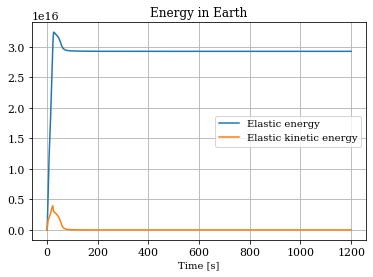

In [15]:
plt.plot(df['time'],df['elastic_energy'], label='Elastic energy')
plt.plot(df['time'],df['elastic_kinetic_energy'], label='Elastic kinetic energy')
plt.legend()
plt.grid()
plt.title("Energy in Earth")
plt.xlabel('Time [s]')

Text(0.5, 0, 'Time [s]')

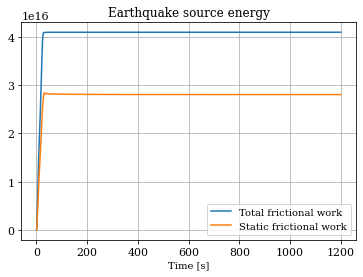

In [16]:
plt.plot(df['time'],df['total_frictional_work'], label='Total frictional work')
plt.plot(df['time'],df['static_frictional_work'], label='Static frictional work')
plt.legend()
plt.grid()
plt.title("Earthquake source energy")
plt.xlabel('Time [s]')

In [14]:
# ATTENTION - probably wrong!
TsunamiPotEnergy = 0
for i in range(len(df)):
    TsunamiPotEnergy += df['gravitational_energy'][i]
print("{:.2e} Joule.".format(TsunamiPotEnergy))

1.42e+14 Joule.


32


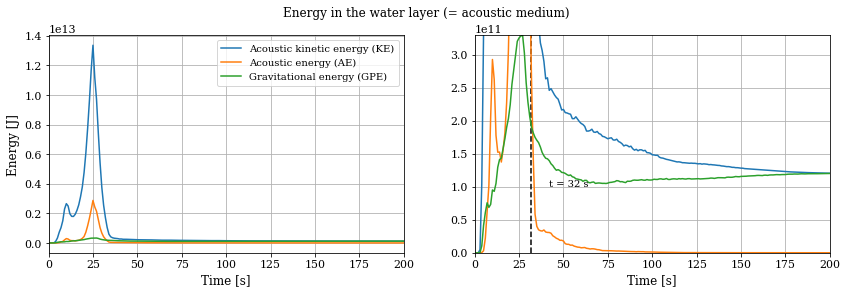

In [21]:
AE = df['acoustic_energy']
GPE = df['gravitational_energy']
KE = df['acoustic_kinetic_energy']

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_figwidth(14)
fig.suptitle("Energy in the water layer (= acoustic medium)")

ax1.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax1.plot(df['time'], AE, label='Acoustic energy (AE)')
ax1.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax1.grid()
ax1.set_xlabel('Time [s]', fontsize=12)
ax1.set_ylabel('Energy [J]', fontsize=12)
# Tsunami Potential Energy is probably wrong!
#ax1.text(x=50,y=3e13, s="Tsunami Potential Energy \n= {:.2e} Joule.".format(TsunamiPotEnergy), rotation=0)
ax1.legend()

ax2.plot(df['time'], KE, label='Acoustic kinetic energy (KE)')
ax2.plot(df['time'], AE, label='Acoustic energy (AE)')
ax2.plot(df['time'], GPE, label='Gravitational energy (GPE)')
ax2.grid()
ax2.set_xlabel('Time [s]', fontsize=12)
#ax2.set_ylabel('Energy [J]', fontsize=12)
ax2.set_ylim([0,max(GPE)])

idx = np.argwhere(np.diff(np.sign(AE - GPE))).flatten()
last_index = idx[len(idx)-1]
ax2.vlines(df['time'][last_index], 0, max(GPE), colors='k', linestyles='dashed', label="t = {} s".format(df['time'][last_index]))
ax2.text(x=df['time'][last_index+10],y=1e11, s="t = {} s".format(df['time'][last_index]), rotation=0)
ax2.set_xlim(0,200)
#ax2.legend()

print(idx[len(idx)-1])